In [ ]:
# Amazon Sales Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amazon.csv")
print("Shape of the dataset:", df.shape)
print(df.head())

Shape of the dataset: (1465, 16)
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1  

In [3]:
# Remove ₹ and , from price columns and convert to float
df['discounted_price'] = df['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹','').str.replace(',','').astype(float)

# Remove % and convert to float
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype(float)

# Convert rating and rating_count to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Display updated info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         326 non-null    float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

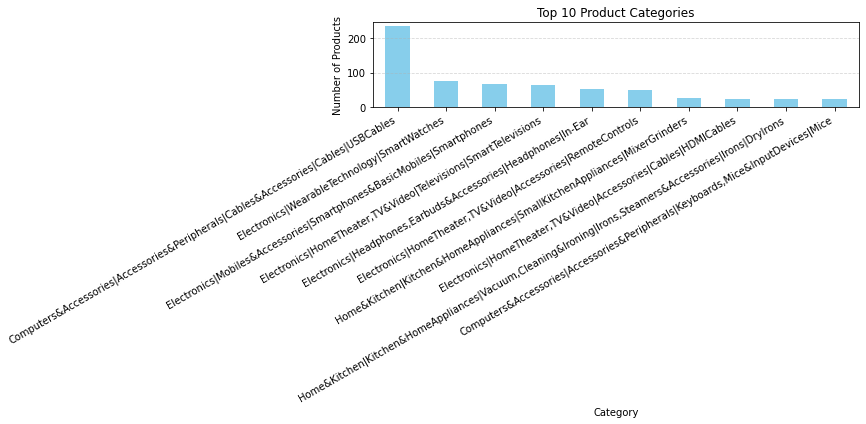

In [4]:
#Top 10 Categories
top_categories = df['category'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_categories.plot(kind='bar', color='skyblue')
plt.title("Top 10 Product Categories")
plt.ylabel("Number of Products")
plt.xlabel("Category")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

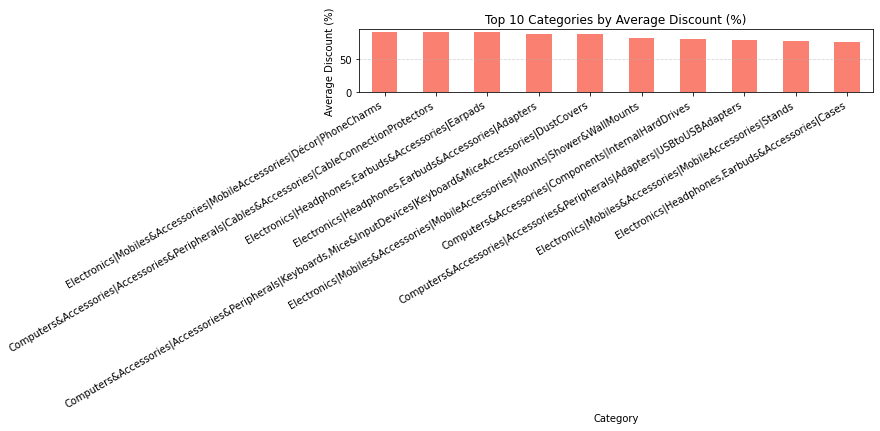

In [5]:
#Average Discount % by Category
avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
avg_discount.plot(kind='bar', color='salmon')
plt.title("Top 10 Categories by Average Discount (%)")
plt.ylabel("Average Discount (%)")
plt.xlabel("Category")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

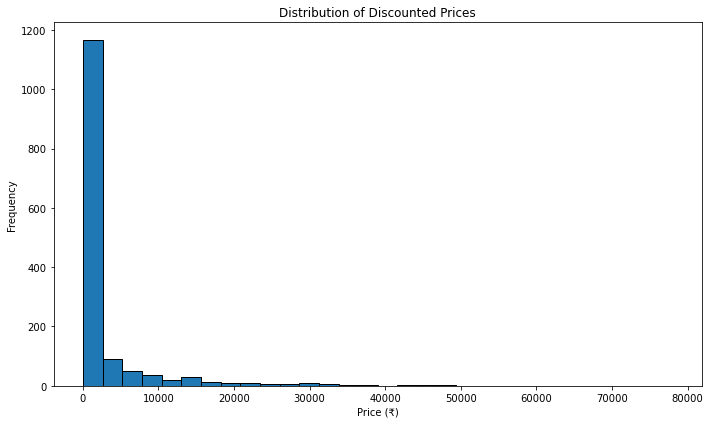

In [6]:
#Price Distribution
plt.figure(figsize=(10,6))
df['discounted_price'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Discounted Prices")
plt.xlabel("Price (₹)")
plt.tight_layout()
plt.show()

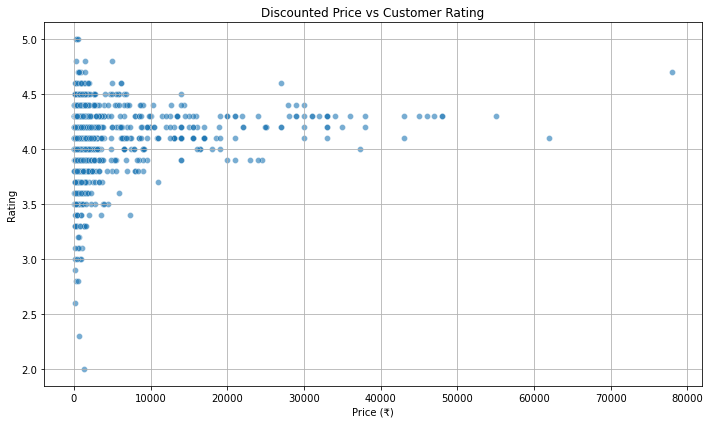

In [7]:
#Scatter Plot: Discounted Price vs. Rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='discounted_price', y='rating', alpha=0.6)
plt.title("Discounted Price vs Customer Rating")
plt.xlabel("Price (₹)")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
"""
### Key Insights:

- Smartwatch and cable-related categories dominate the listings.
- Categories like 'Home Audio' and 'Headphones' have the highest average discounts.
- Most products are priced below ₹5,000.
- There is no strong relationship between low prices and poor ratings — consumers rate low-priced items fairly well.

"""